# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Dede Husen]
- **Email:** [adehusen@gmail.com]
- **ID Dicoding:** [dhe_zhen]

## Menentukan Pertanyaan Bisnis

1.   Bagaiamana Pengaruh Cuaca terhadap jumlah penyewaan
Sepeda?
2.   Apakah jenis musim mempunyai pengaruh terhadap jumlah penyewaan sepeda?
3. Apakah hari libur atau hari kerja berdampak terhadap jumlah penyewaan sepeda?
4. Tren performa penyewaan dalam bulan ke bulan terakhir?
5. Pada jam berapa orang banyak menyewa sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# !pip install pydrive2

import os
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


## Data Wrangling

### Gathering Data

ambil data dari gdrive dataset bikesharing dicoding

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace 'YOUR_FILE_ID' with the actual file ID from Google Drive
file_id = '1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ'

# Download the file
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('downloaded_file.zip')


# Unzip the file
!unzip downloaded_file.zip


Archive:  downloaded_file.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [33]:
#load data frame day
bsDay_df = pd.read_csv("day.csv")
total_data = bsDay_df['instant'].count()
total_column = bsDay_df.shape[1]
print("total data: ", total_data)
print("total column: ", total_column)

bsDay_df.head(10)

total data:  731
total column:  16


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- kita telah meload data Day.csv dan membuat dataframe nya
- terdapat 16 kolom dengan total 731 baris data (hari)

In [36]:
#load data frame day
bsHour_df = pd.read_csv("hour.csv")
total_data = bsHour_df['instant'].count()
total_column = bsHour_df.shape[1]
print("total data: ", total_data)
print("total column: ", total_column)

bsDay_df.head(10)

total data:  17379
total column:  17


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- kita telah meload data Day.csv dan membuat dataframe nya
- terdapat 17 kolom dengan total 17.379 baris data (jam)

### Assessing Data

In [5]:
#cek tipe  data day dan hour di setiap kolomnya
bsDay_df.info()
bsHour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Terdapat 731 baris data day dan 17379 baris data hour
- pada bagian data frame hour terdapat 16 kolom dan 17 kolom pada data frame day  

In [6]:
#cek nilai kosong (missing value) data frame hour
bsHour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
bsDay_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- tidak terdapat data kosong pada data frame day dan hour

In [8]:
# cek duplikasi data
duplikasi_day = bsDay_df.duplicated().sum()
duplikasi_hour = bsHour_df.duplicated().sum()
print("duplikasi data day: ", duplikasi_day)
print("duplikasi data hour: ", duplikasi_hour)

duplikasi data day:  0
duplikasi data hour:  0


Insight:
tidak terdapat duplikasi data pada kedua dataframe



In [9]:
# cek parameter statistik dalam data frame day
bsDay_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
bsHour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data


*   Drop kolom kolom windspeed, instant karena tidak ada dalam pertanyaan bisnis

*   Mengganti nama-nama kolom agar lebih mudah dibaca

*   Konversi value pada kolom agar mudah dibaca


*   Ubah tipe data dari int ke datetime pada kolom dteday
*   List item







Drop Kolom yang tidak akan digunakan
  

In [11]:
bsDay_df = bsDay_df.drop(columns=['windspeed', 'instant'])
bsHour_df = bsHour_df.drop(columns=['windspeed', 'instant'])

Update nama kolom agar mudah dibaca pada databsDay dan bsHour
  

In [12]:
bsDay_df = bsDay_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'cnt': 'count',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hum': 'humidity',
    'atemp': 'feeling_temperature',
    'casual': 'casual_count',
    'registered': 'registered_count'
})

bsHour_df = bsHour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'cnt': 'count',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'hum': 'humidity',
    'atemp': 'feeling_temperature',
    'casual': 'casual_count',
    'registered': 'registered_count'
})
bsHour_df.head()

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feeling_temperature,humidity,casual_count,registered_count,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


In [13]:
bsDay_df.head()

,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feeling_temperature,humidity,casual_count,registered_count,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Okey samapai disini kita bisa melihat kolom yang sudah diubah dan lebih enak dibaca. Jika kita lihat ada beberapa value dari setia kolom yang belum dapat dibaca secara harfiah, artinya nilai-nilai masih dalam bentuk angka-angka, agar mudah dibaca kita akan merubah nilai-nilai tersebut agar lebih mudah dibaca dan kita sesuaikan tipe datanya


In [14]:
#1. mulai dari kolom season kita akan rubah sesuai keterangan pada file readme.nmd
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}
bsDay_df['season'] = bsDay_df['season'].map(season_mapping)
bsHour_df['season'] = bsHour_df['season'].map(season_mapping)


#2. kemudian kolom year dari 0=2011 dan 1 =2012
year_mapping = {
    0: 2011,
    1: 2012
}

bsDay_df['year'] = bsDay_df['year'].map(year_mapping)
bsHour_df['year'] = bsHour_df['year'].map(year_mapping)


#3. kemudian kita rubah kolom month menjadi nama-nama bulan
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

bsDay_df['month'] = bsDay_df['month'].map(month_mapping)
bsHour_df['month'] = bsHour_df['month'].map(month_mapping)

#4. selanjutnya ubah value kolom day_of_week menajadi nama_nama hari
day_of_week_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

bsDay_df['day_of_week'] = bsDay_df['day_of_week'].map(day_of_week_mapping)
bsHour_df['day_of_week'] = bsHour_df['day_of_week'].map(day_of_week_mapping)

#5. ubah nilai pada kolom weather_condition menjadi
weather_condition_mapping = {
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light_rain_now',
    4: 'Heavy_rain_snow',
}

bsDay_df['weather_condition'] = bsDay_df['weather_condition'].map(weather_condition_mapping)
bsHour_df['weather_condition'] = bsHour_df['weather_condition'].map(weather_condition_mapping)


#6. Mengubah nilai humidity nilai_kolom*100
bsDay_df['humidity'] = bsDay_df['humidity'] * 100
bsHour_df['humidity'] = bsHour_df['humidity'] * 100

In [15]:

print("=====data bsDay=======")
display(bsDay_df.head())

print("=====data bsHour======")

display(bsHour_df.head())

=====data bsDay=======


,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feeling_temperature,humidity,casual_count,registered_count,count
0,2011-01-01,spring,2011,January,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,80.5833,331,654,985
1,2011-01-02,spring,2011,January,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,69.6087,131,670,801
2,2011-01-03,spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,43.7273,120,1229,1349
3,2011-01-04,spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,59.0435,108,1454,1562
4,2011-01-05,spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,43.6957,82,1518,1600


=====data bsHour======


,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feeling_temperature,humidity,casual_count,registered_count,count
0,2011-01-01,spring,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,81.0,3,13,16
1,2011-01-01,spring,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,80.0,8,32,40
2,2011-01-01,spring,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,80.0,5,27,32
3,2011-01-01,spring,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,75.0,3,10,13
4,2011-01-01,spring,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0,1,1


Data sudah diubah kedalam tabel yang lebih mudah dibaca

Selajutnya kita konversi tipe data

In [16]:
#ubah tipe data kolom date
bsDay_df['date'] = pd.to_datetime(bsDay_df['date'])
bsHour_df['date'] = pd.to_datetime(bsHour_df['date'])

#ubah tipe data kolom year, season, month, is_holiday, is_weekday, is_workingday, weather_condition menajdui kategori
bsDay_df['year'] = bsDay_df['year'].astype('category')
bsDay_df['season'] = bsDay_df['season'].astype('category')
bsDay_df['month'] = bsDay_df['month'].astype('category')
bsDay_df['is_holiday'] = bsDay_df['is_holiday'].astype('category')
bsDay_df['day_of_week'] = bsDay_df['day_of_week'].astype('category')
bsDay_df['is_workingday'] = bsDay_df['is_workingday'].astype('category')
bsDay_df['weather_condition'] = bsDay_df['weather_condition'].astype('category')

bsHour_df['year'] = bsHour_df['year'].astype('category')
bsHour_df['season'] = bsHour_df['season'].astype('category')
bsHour_df['month'] = bsHour_df['month'].astype('category')
bsHour_df['is_holiday'] = bsHour_df['is_holiday'].astype('category')
bsHour_df['day_of_week'] = bsHour_df['day_of_week'].astype('category')
bsHour_df['is_workingday'] = bsHour_df['is_workingday'].astype('category')
bsHour_df['weather_condition'] = bsHour_df['weather_condition'].astype('category')

bsDay_df.info()
bsHour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 731 non-null    datetime64[ns]
 1   season               731 non-null    category      
 2   year                 731 non-null    category      
 3   month                731 non-null    category      
 4   is_holiday           731 non-null    category      
 5   day_of_week          731 non-null    category      
 6   is_workingday        731 non-null    category      
 7   weather_condition    731 non-null    category      
 8   temperature          731 non-null    float64       
 9   feeling_temperature  731 non-null    float64       
 10  humidity             731 non-null    float64       
 11  casual_count         731 non-null    int64         
 12  registered_count     731 non-null    int64         
 13  count                731 non-null  

## Exploratory Data Analysis (EDA)

### Explore ...

###explore bsDay


In [17]:
#parameter dataset bsDay
bsDay_df.describe(include="all")

,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feeling_temperature,humidity,casual_count,registered_count,count
count,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012.0,August,0.0,Monday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,3410.000000,6946.000000,8714.000000


In [18]:

# kalkulasi total penyewa dan kelompokan berdasarkan season dan jumlahkan
season_rentals = bsDay_df.groupby('season')['count'].mean()
total_rentals_per_season = bsDay_df.groupby('season')['count'].sum()

season_rental_summary = pd.DataFrame({
    'Average Rentals': season_rentals,
    'Total Rentals': total_rentals_per_season
})

# Sort by total rentals in descending order
season_rental_summary = season_rental_summary.sort_values(by='Total Rentals', ascending=False)
season_rental_summary


<ipython-input-18-efe678aa1642>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = bsDay_df.groupby('season')['count'].mean()
<ipython-input-18-efe678aa1642>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rentals_per_season = bsDay_df.groupby('season')['count'].sum()


,Average Rentals,Total Rentals
season,,
fall,5644.303191,1061129
summer,4992.331522,918589
winter,4728.162921,841613
spring,2604.132597,471348




## Hasil Explore Data bsDay
*   Terdapat 731 baris data pada dataset bsDay
*   Musim fall adalah musim yang paling sering melakukan penyewaan



*    bulan agustus adalah bulan yang paling banyak penyewanya
*   Monday adalah hari yang paling banyak penyewanya

*   Working day adalah waktu yang paling yang paling banyak penyewanya
*   Cuaca cerah yang paling banyak penyewanya

*   dapat kita lihat urutan penyewa berdasarkan season adalah season fall, summer, winter dan spring







## exlplore data bsHour

In [19]:
# Statistik Data bsHour
bsHour_df.describe(include="all")

,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feeling_temperature,humidity,casual_count,registered_count,count
count,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,2012.0,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,63.000000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,78.000000,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,100.000000,367.000000,886.000000,977.000000


### insight
Berdasarkan hail deskripsi data bsHour kita dapat melihat bahwa



*   Terdapat 17.379 baris data penyewaan
*   Rata-rata penyewaan sepedah adalah pada jam 11.54


In [20]:
# Group data by hour and sum the 'count' column
hourly_rentals = bsHour_df.groupby('hour')['count'].sum().sort_values(ascending=False)
hourly_rentals


,count
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


## insight
dari data tersebut kita dapat melihat bahwa pukul 17.00 dan jam yang paling sedikit penyewanya adalah pada pukul 04.00

## Visualization & Explanatory Analysis

1.   Bagaiamana Pengaruh Cuaca terhadap jumlah penyewaan
Sepeda?
2.   Apakah jenis musim mempunyai pengaruh terhadap jumlah penyewaan sepeda?
3. Apakah hari libur atau hari kerja berdampak terhadap jumlah penyewaan sepeda?
4. Tren performa penyewaan dalam bulan ke bulan terakhir?
5. Pada jam berapa orang banyak menyewa sepeda?











### Pertanyaan 1:Bagaimana Pengaruh Cuaca terhadap jumlah penyewaan Sepeda?

<ipython-input-21-85ae59b27d06>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = bsDay_df.groupby('weather_condition')['count'].mean().sort_values(ascending=False)


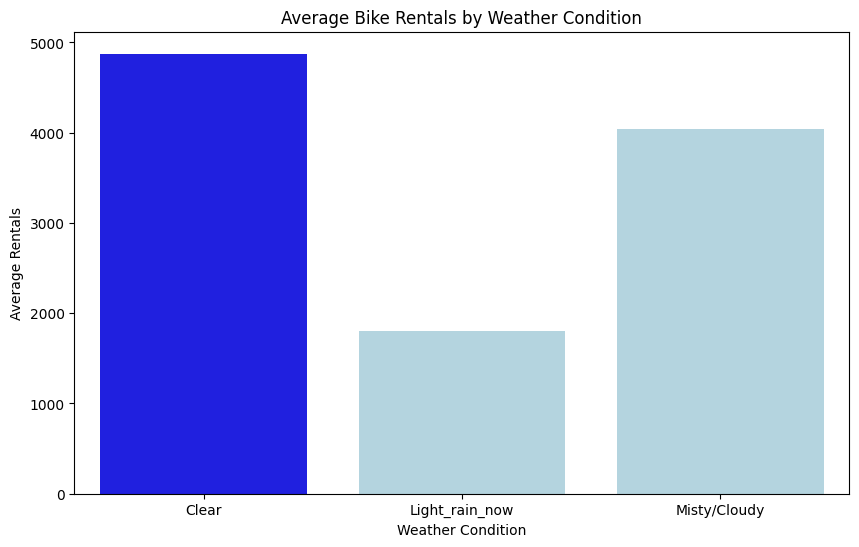

In [ ]:
# Group data by weather condition and calculate the average rentals
weather_rentals = bsDay_df.groupby('weather_condition')['count'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))

# Create a list of colors, with a different color for the highest bar
colors = ['lightblue' if (x != weather_rentals.max()) else 'blue' for x in weather_rentals]

# Assign 'weather_condition' to 'hue' and set legend to False
sns.barplot(x=weather_rentals.index, y=weather_rentals.values, hue=weather_rentals.index, palette=colors, dodge=False, legend=False)

plt.title('Rata-rata penyewaan Sepedah Berdasarkan Kondisi Cuaca')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.show()

Berdasarkan hasil analisis rata-rata penyewaan berdasarkan kondisi cuaca, maka dapat disimpulkan penyyewaan sepedah paling banyak ketika kondi cuaca cerah (clear), kemudian Misty/Cloud, light_rain_snow dan heavy_rain



### Pertanyaan 2: Apakah jenis musim mempunyai pengaruh terhadap jumlah penyewaan sepeda?

<ipython-input-22-fc7db47aee80>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = bsDay_df.groupby('season')['count'].mean().sort_values(ascending=False)
<ipython-input-22-fc7db47aee80>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rentals_per_season = bsDay_df.groupby('season')['count'].sum().sort_values(ascending=False)


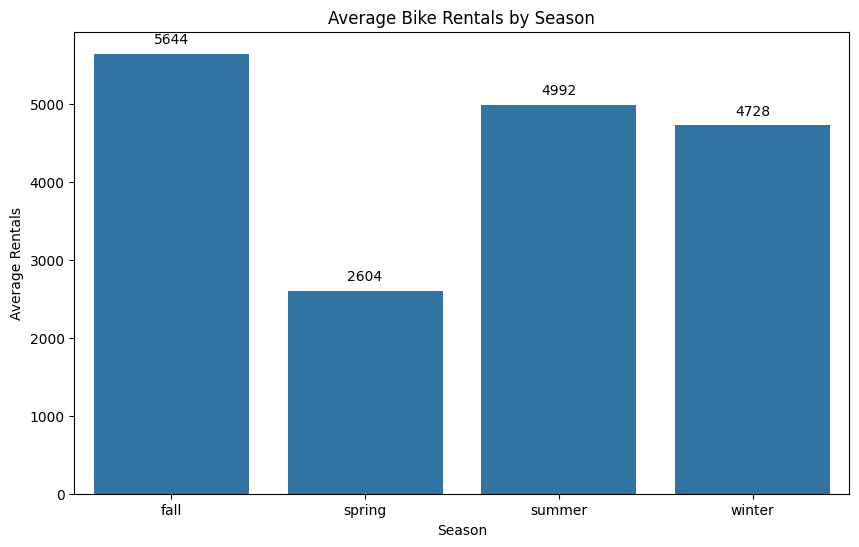

In [ ]:
season_rentals = bsDay_df.groupby('season')['count'].mean().sort_values(ascending=False)
total_rentals_per_season = bsDay_df.groupby('season')['count'].sum().sort_values(ascending=False)

season_rental_summary = pd.DataFrame({
    'Average Rentals': season_rentals,
    'Total Rentals': total_rentals_per_season
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=season_rental_summary.index, y=season_rental_summary['Average Rentals'])
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')

# Add average rentals as labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  # Display only average rentals
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()



Dari bar chart tersebut kita dapat melihat jumlah rata-rata penyewaan berdasarkan musim dimana musim yang paling banyak penyewaan adalah pada musim gugur (fall) dan yang paling sedikit adalah pada saat musim semi (spring)


### Pertanyaan Ke-3: Apakah hari libur atau hari kerja berdampak terhadap jumlah penyewaan sepeda?

<ipython-input-23-912141875d72>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_percentages = bsDay_df.groupby('is_workingday')['count'].sum() / bsDay_df['count'].sum() * 100
<ipython-input-23-912141875d72>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_totals = bsDay_df.groupby('is_workingday')['count'].count()


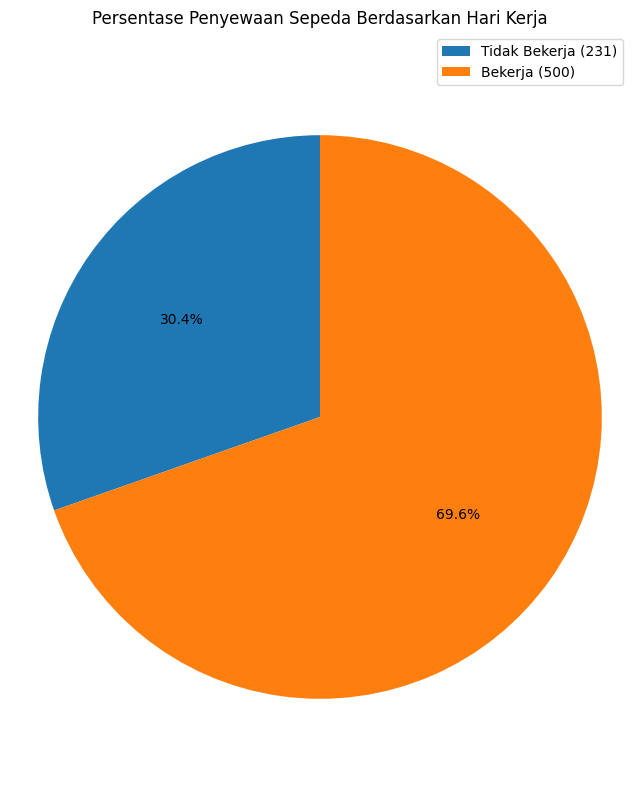

In [23]:
# Calculate the percentage of rentals for each working day status
workingday_percentages = bsDay_df.groupby('is_workingday')['count'].sum() / bsDay_df['count'].sum() * 100
workingday_totals = bsDay_df.groupby('is_workingday')['count'].count()

# Create labels for the legend with total counts
labels = [f'Tidak Bekerja ({workingday_totals[0]:,})', f'Bekerja ({workingday_totals[1]:,})']

# Create the pie chart
plt.figure(figsize=(8, 10))
plt.pie(workingday_percentages,
        # labels=labels,  # Use the labels with total counts
        autopct='%1.1f%%',
        startangle=90)

plt.title('Persentase Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.axis('equal')
plt.legend(labels)
plt.show()

# workingday_totals


Dari grafik tersebut kita dapat melihat bahwa hari bekerja  memiliki tingkat penyewaan yang lebih tinggi (69.6%) daripada saat holiday (30.4%)

### Pertanyaan Ke-4:Tren performa penyewaan dari bulan ke bulan?

<ipython-input-24-1df427d4505d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = bsDay_df.groupby(['year', 'month'])['count'].sum().reset_index()


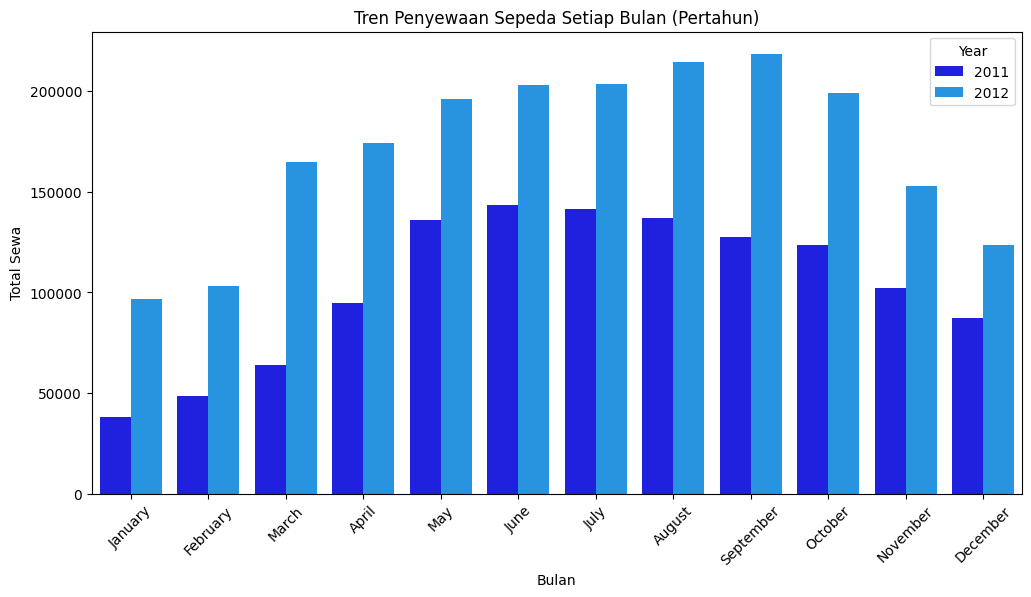

In [ ]:
# Group data by year and month, then sum the 'count' column
monthly_rentals = bsDay_df.groupby(['year', 'month'])['count'].sum().reset_index()

# Convert 'month' to categorical with specific order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_rentals['month'] = pd.Categorical(monthly_rentals['month'], categories=month_order, ordered=True)

# Sort the DataFrame by year and month
monthly_rentals = monthly_rentals.sort_values(['year', 'month'])

# Create the line plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', hue='year', data=monthly_rentals, palette=["Blue","#0998fd"])
plt.title('Tren Penyewaan Sepeda Setiap Bulan (Pertahun)')
plt.xlabel('Bulan')
plt.ylabel('Total Sewa')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


Dari visualisasi tren penyewaan sepeda di setiap bulannya terjadi peningkatan secara signinifikan di tahun 2011 sampai tahun 2012, bahkan kita bisa melihat pebedaan setiap bulannya. pada tahun 2011 Puncak penyewaan sepeda terjadi di bulan Juni dan pada tahun 2012 puncak penyewaaan terjadi di bulan september

### Pertanyaaan Ke-5: Pada jam berapa orang banyak menyewa sepeda?

<ipython-input-25-fe44fd415b49>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='count', data=bsHour_df, estimator=sum, ci=None, order=sorted_hours_by_rentals, palette=["Blue"])
<ipython-input-25-fe44fd415b49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='count', data=bsHour_df, estimator=sum, ci=None, order=sorted_hours_by_rentals, palette=["Blue"])
<ipython-input-25-fe44fd415b49>:6: UserWarning: 
The palette list has fewer values (1) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='hour', y='count', data=bsHour_df, estimator=sum, ci=None, order=sorted_hours_by_rentals, palette=["Blue"])


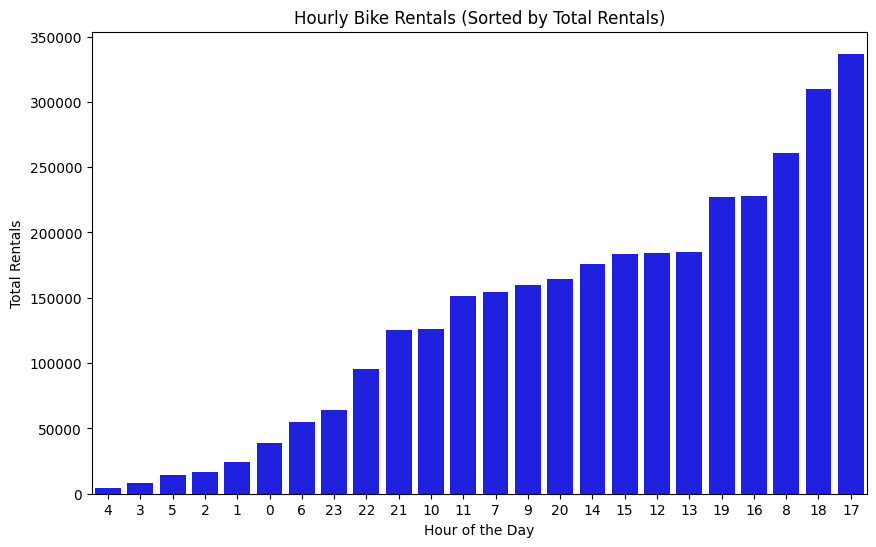

In [25]:
# Hitung total penyewa untuk setiap jam dan urutkan berdasarkan total penyewa
hourly_rentals = bsHour_df.groupby('hour')['count'].sum().sort_values(ascending=True)
sorted_hours_by_rentals = hourly_rentals.index

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=bsHour_df, estimator=sum, ci=None, order=sorted_hours_by_rentals, palette=["Blue"])
plt.title('Hourly Bike Rentals (Sorted by Total Rentals)')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals')
plt.show()


Dari visualasi tersebut kita dapat menyimpulkan bahwa puncak tertinggi dari penyewaan sepeda adalah pada pukul 17.00  sore dan paling sedikit adalah pada pukul 4  pagi

## Analisis Lanjutan (Opsional)



### Clustering total  penyewa berdasarkan musim



<ipython-input-26-06c12b492041>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg_rentals = bsDay_df.groupby('season')['count'].mean()


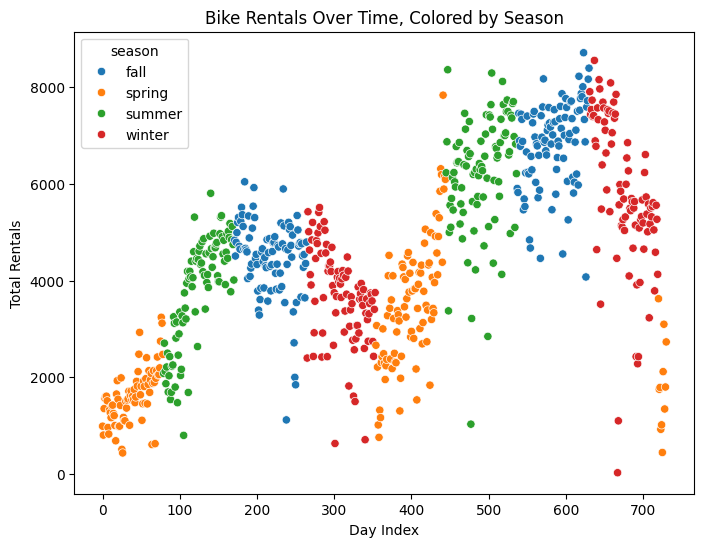

In [26]:
# Calculate average rentals per season
season_avg_rentals = bsDay_df.groupby('season')['count'].mean()

# Create a scatter plot colored by season (for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bsDay_df.index, y=bsDay_df['count'], hue=bsDay_df['season'])
plt.title('Bike Rentals Over Time, Colored by Season')
plt.xlabel('Day Index')
plt.ylabel('Total Rentals')
plt.show()


jika dilihat dari sebaran total penyewaan sepedah setiap hari nya musim dengan penyewaan tertinggi adalah season fall dan season summer. kemudian tren lainnya adalah pada musim winter terjadi lebih banyak penurunan penyewaan dari musim fall


### Clustering penyewa berdasarkan cuaca

<ipython-input-27-2a82b0cbc3e5>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_avg_rentals = bsDay_df.groupby('weather_condition')['count'].mean()


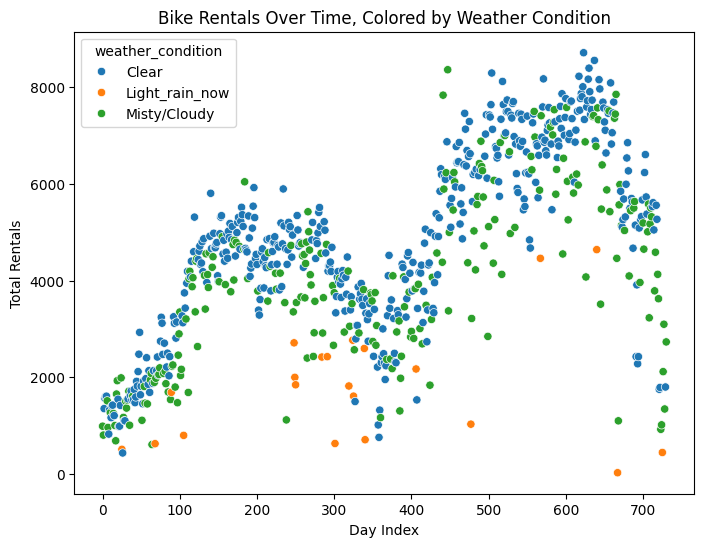

Average rentals per weather condition:
 weather_condition
Clear             4876.786177
Light_rain_now    1803.285714
Misty/Cloudy      4035.862348
Name: count, dtype: float64


In [27]:
# Calculate average rentals per weather condition
weather_avg_rentals = bsDay_df.groupby('weather_condition')['count'].mean()

# Create a scatter plot colored by weather condition (for visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bsDay_df.index, y=bsDay_df['count'], hue=bsDay_df['weather_condition'])
plt.title('Bike Rentals Over Time, Colored by Weather Condition')
plt.xlabel('Day Index')
plt.ylabel('Total Rentals')
plt.show()
# Example of a more descriptive analysis (without a clustering algorithm):
print("Average rentals per weather condition:\n", weather_avg_rentals)

Ber

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2